In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import pickle
import constants

In [2]:
# Importando os dados do banco de dados MySQL e criando um dataframe Pandas com eles

def import_data():
  db = mysql.connector.connect(
    host=constants.DatabaseConfig.HOST,
    user=constants.DatabaseConfig.USER,
    passwd=constants.DatabaseConfig.PASSWORD,
    database=constants.DatabaseConfig.DATABASE
  )
  cursor = db.cursor()
  cursor.execute("SELECT * FROM germancredit")
  result = cursor.fetchall()
  db.close()
  return result

def create_dataframe():
  data = import_data()
  df = pd.DataFrame(data)
  df.columns = ["id", "status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk"]
  return df

df = create_dataframe()
df.head()

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,2,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,3,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,4,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,2,1,1,1


In [3]:
# Informações úteis sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   id                       1000 non-null   int64
 1   status                   1000 non-null   int64
 2   duration                 1000 non-null   int64
 3   credit_history           1000 non-null   int64
 4   purpose                  1000 non-null   int64
 5   amount                   1000 non-null   int64
 6   savings                  1000 non-null   int64
 7   employment_duration      1000 non-null   int64
 8   installment_rate         1000 non-null   int64
 9   personal_status_sex      1000 non-null   int64
 10  other_debtors            1000 non-null   int64
 11  present_residence        1000 non-null   int64
 12  property                 1000 non-null   int64
 13  age                      1000 non-null   int64
 14  other_installment_plans  1000 non-null   int64
 15  housi

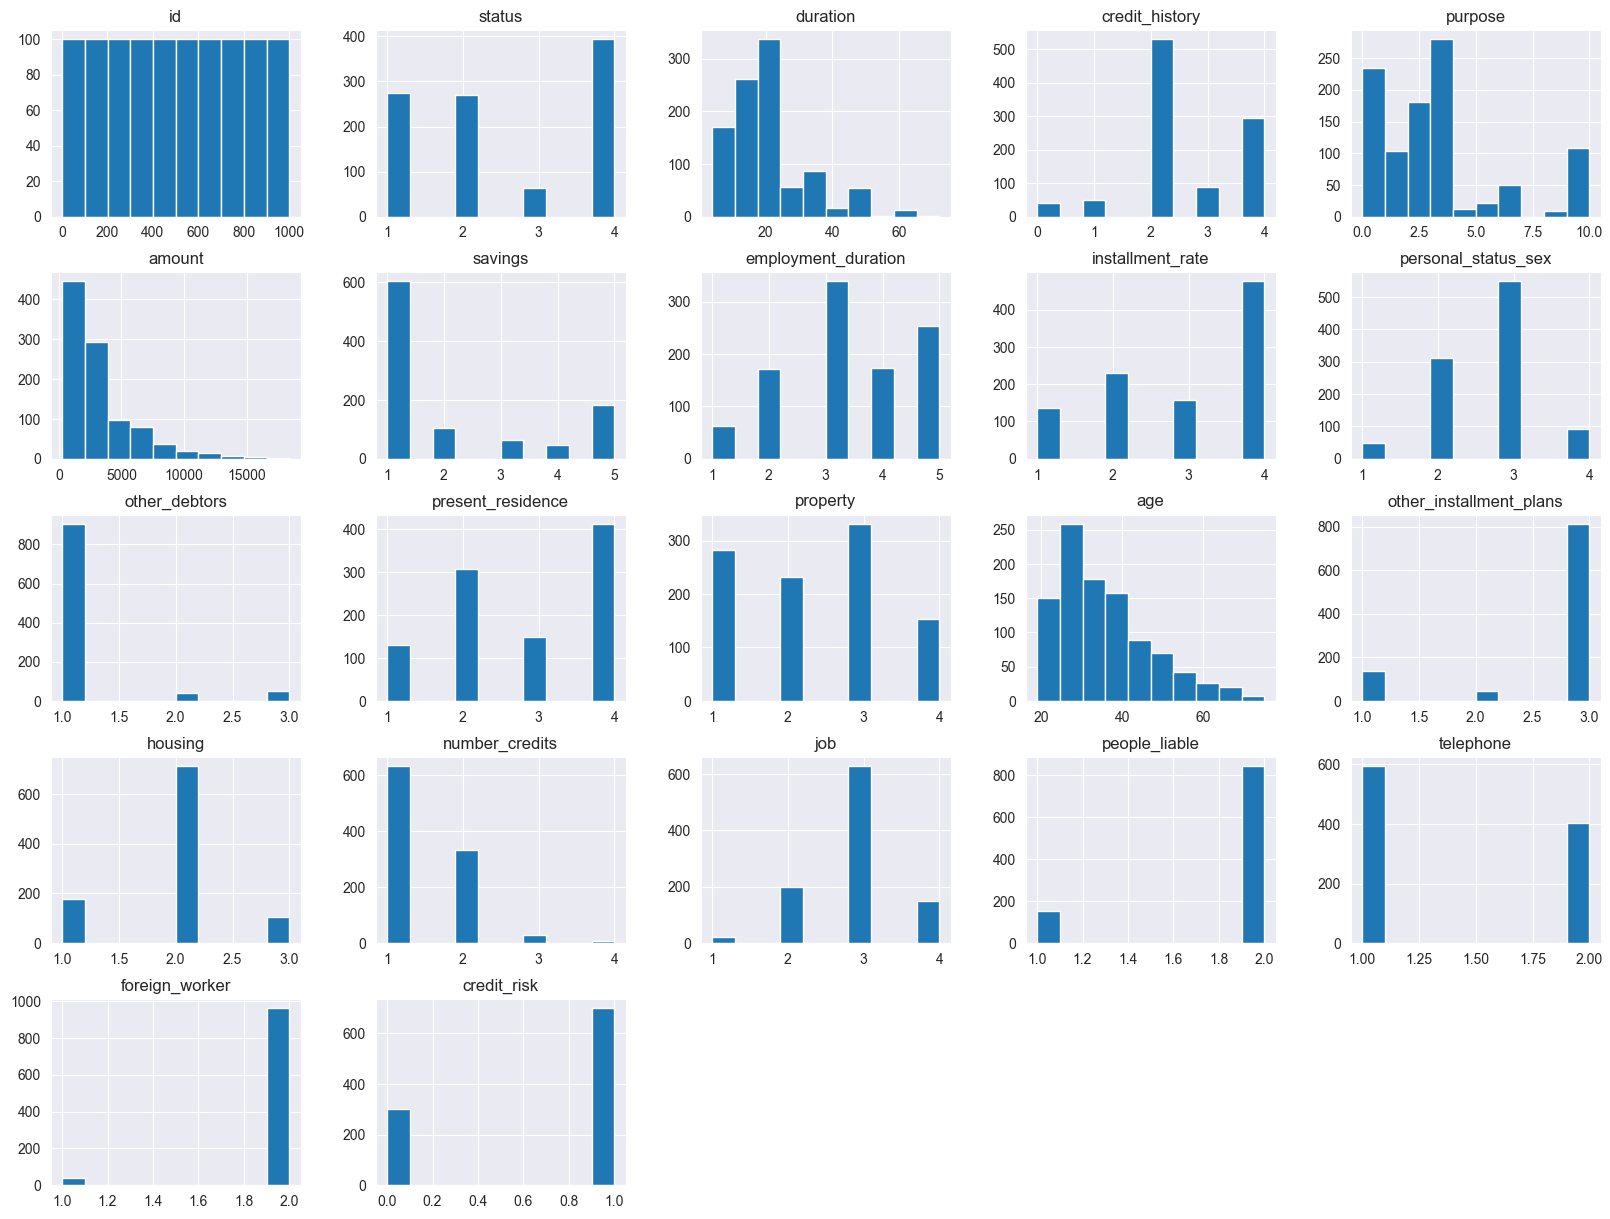

In [4]:
# Plotando histogramas para visualizar a distribuição dos dados
df.hist(figsize=(20, 15))
plt.show()

In [5]:
# Criando um dataframe Pandas com os dados de entrada e outro com os dados de saída

def create_input_output_dataframes():
  input_df = df.drop(["id", "credit_risk"], axis=1)
  output_df = df["credit_risk"]
  return input_df, output_df

input_df, output_df = create_input_output_dataframes()

In [6]:
# Checando os valores de entrada
input_df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1


In [7]:
# Checando os valores de saída
output_df.head()

0    1
1    1
2    1
3    1
4    1
Name: credit_risk, dtype: int64

In [8]:
# Dividindo os dados de entrada e saída em dados de treino e teste

def split_data(input_df, output_df):
  X_train, X_test, y_train, y_test = train_test_split(input_df, output_df, test_size=0.2, random_state=42)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data(input_df, output_df)

In [9]:
# Criando o modelo de machine learning usando o algoritmo Decision Tree

def create_model():
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  return model

model = create_model()

In [10]:
# Fazendo previsões com o modelo de machine learning
def predict(model, X_test):
  y_pred = model.predict(X_test)
  return y_pred

y_pred = predict(model, X_test)

In [11]:
# Avaliando o modelo de machine learning

def evaluate_model(y_test, y_pred):
  print("Accuracy: ", accuracy_score(y_test, y_pred))

evaluate_model(y_test, y_pred)

Accuracy:  0.73


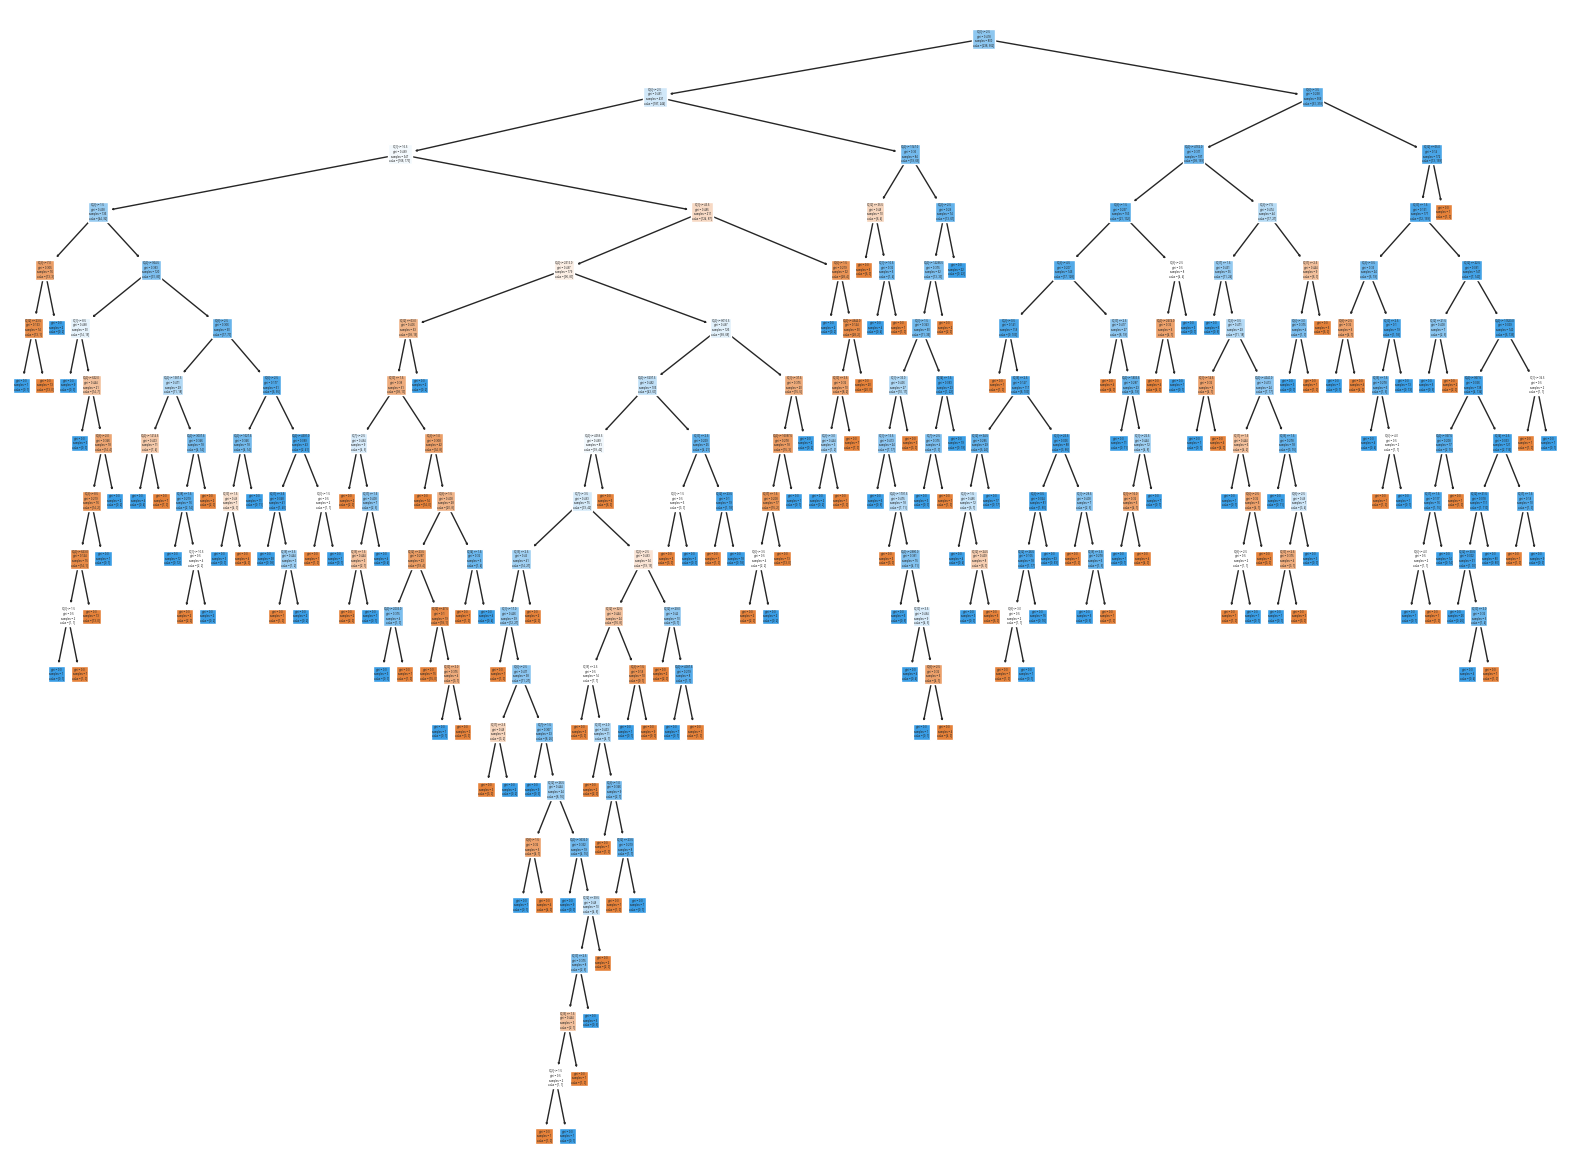

In [12]:
# Plotando a árvore de decisão

plt.figure(figsize=(20, 15))
tree.plot_tree(model, filled=True)
plt.show()

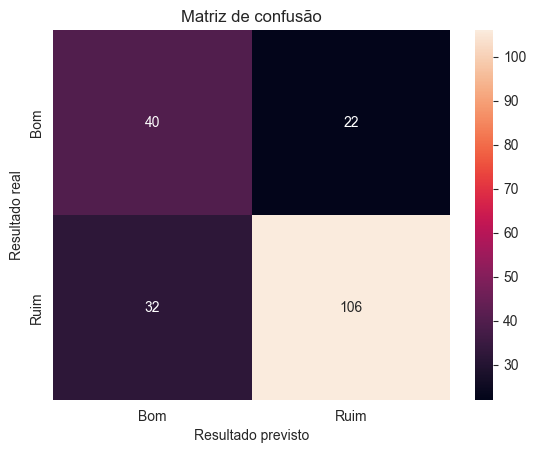

In [13]:
# Plotando a matriz de confusão

def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax, fmt="d")
  ax.set_xlabel("Resultado previsto")
  ax.set_ylabel("Resultado real")
  ax.set_title("Matriz de confusão")
  ax.xaxis.set_ticklabels(["Bom", "Ruim"])
  ax.yaxis.set_ticklabels(["Bom", "Ruim"])

plot_confusion_matrix(y_test, y_pred)

In [14]:
# Copiando o dataset de treino transformado para um novo dataset e voltando a variavel target credit_risk
df_deploy = input_df.copy()
df_deploy.insert(0, "id", df["id"])
df_deploy["credit_risk"] = output_df
df_deploy.head()

,id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,2,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,3,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,4,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,12,4,0,2171,1,3,4,3,...,2,38,1,2,2,2,2,1,1,1


In [15]:
# Salvando o modelo de machine learning para um arquivo sav
pickle.dump(model, open('assets/credit_risk_model.sav', 'wb'))